# <b> Machine Learning project 

## Topics: 
  Regression,Classification and Clustring  Problems

## Objective:
     The goal of this project is to classify individuals based on obesity-related factors, predict numerical outcomes, and perform clustering. You will preprocess the dataset, apply PCA for feature selection, and train and evaluate multiple classifiers. Additionally, you will perform regression and clustering tasks to gain further insights from the dataset.  

## Dataset:
The dataset provided is named ObesityDataset.csv and contains the following features: 
• Gender: Categorical 
• Age: Numeric
• Height: Numeric (in cm) 
• Weight: Numeric (in kg)
• family_history_with_overweight: Categorical (Yes/No) 
• FAVC: Categorical (Frequent Consumption of High Calorie Food - Yes/No) 
• FCVC: Categorical (Frequent Consumption of Vegetables - Yes/No) 
• NCP: Numeric (Number of main meals per day) 
• CAEC: Categorical (Consumption of food between meals - Yes/No) 
• SMOKE: Categorical (Smokes - Yes/No) 
• CH2O: Categorical (Water consumption - Yes/No) 
• FAF: Numeric (Physical Activity Level) 
• TUE: Categorical (Time spent on eating - Yes/No) 
• CALC: Categorical (Consumption of caloric intake - Yes/No) 
• MTRANS: Categorical (Transportation used - Walking/Other) 
• NObeyesdad: Target Variable (Obesity Status - No/Yes)  

## 1. Classification:

<b>1. Data Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***o Load the dataset and clean the data (handle missing values, outliers, etc.).***

In [2]:
data=pd.read_csv('ObesityDataset.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
data.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No missing values found.

In [4]:
data=data.drop_duplicates()

In [5]:
a=data.shape[0]
a

2087

In [6]:
# outlier detection:
Q1=data['Weight'].quantile(0.25)
Q3=data['Weight'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
cleandf= data[(data['Weight'] >= lower_bound) & (data['Weight'] <= upper_bound)]
cleandf

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
b=cleandf.shape[0]
b

2086

In [8]:
outliers=a-b
outliers

1

***oEncode categorical features and the target variable.***

In [9]:
from sklearn.preprocessing import LabelEncoder
pd.options.mode.copy_on_write = True
le = LabelEncoder()
data['Encoded_NObeyesdad']= le.fit_transform(data['NObeyesdad'])
data['Encoded_overweight']= le.fit_transform(data['family_history_with_overweight'])
data['Encoded_FAVC']= le.fit_transform(data['FAVC'])
data['Encoded_CAEC']= le.fit_transform(data['CAEC'])
data['Encoded_SMOKE']= le.fit_transform(data['SMOKE'])
data['Encoded_CALC']= le.fit_transform(data['CALC'])
data['Encoded_MTRANS']= le.fit_transform(data['MTRANS'])
data['Encoded_genders']= le.fit_transform(data['Gender'])
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,Encoded_NObeyesdad,Encoded_overweight,Encoded_FAVC,Encoded_CAEC,Encoded_SMOKE,Encoded_CALC,Encoded_MTRANS,Encoded_genders
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,1,1,0,2,0,3,3,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,Public_Transportation,Normal_Weight,1,1,0,2,1,2,3,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,Public_Transportation,Normal_Weight,1,1,0,2,0,1,3,1
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,Walking,Overweight_Level_I,5,0,0,2,0,1,4,1
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,Public_Transportation,Overweight_Level_II,6,0,0,2,0,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,4,1,1,2,0,2,3,0
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,4,1,1,2,0,2,3,0
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,4,1,1,2,0,2,3,0
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,Public_Transportation,Obesity_Type_III,4,1,1,2,0,2,3,0


***oScale numerical features.***

In [10]:
pd.options.mode.copy_on_write = True
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features =['Age','Height','Weight','FCVC','NCP']	
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data[numerical_features]

,Age,Height,Weight,FCVC,NCP
0,-0.526613,-0.887408,-0.872985,-0.788364,0.390906
1,-0.526613,-1.960788,-1.178508,1.082164,0.390906
2,-0.212507,1.044677,-0.376509,-0.788364,0.390906
3,0.415705,1.044677,0.005395,1.082164,0.390906
4,-0.369560,0.830001,0.112328,-0.788364,-2.225418
...,...,...,...,...,...
2106,-0.530250,0.086470,1.701376,1.082164,0.390906
2107,-0.372239,0.492788,1.790528,1.082164,0.390906
2108,-0.287258,0.531665,1.788482,1.082164,0.390906
2109,0.001389,0.394745,1.775393,1.082164,0.390906


<b>2. Feature Selection using PCA:

***oApply PCA to reduce the dimensionality of the dataset.***

In [11]:
from sklearn.decomposition import PCA

In [12]:
df=pd.read_csv('ObesityDataset.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [13]:
y=df.drop(columns=['family_history_with_overweight','FAVC','CAEC','SMOKE','Gender','CALC','MTRANS'],axis=1)
y


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III


In [14]:
df=y
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,Normal_Weight
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,Normal_Weight
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,Normal_Weight
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,Overweight_Level_I
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,Obesity_Type_III
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,Obesity_Type_III
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,Obesity_Type_III
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,Obesity_Type_III


In [15]:
x = df.iloc[:,:-1]
x

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


In [16]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(x)
X_pca


array([[-2.27267977e+01, -2.12570096e+00, -7.82596790e-01,
         7.90042386e-01,  2.48887040e-01,  3.91708531e-01],
       [-3.07102962e+01, -1.75097980e+00,  2.05833728e+00,
        -6.10964513e-01, -1.10263689e+00,  4.38836867e-01],
       [-9.64402290e+00, -8.42931189e-01,  9.92384563e-01,
        -9.36539195e-02,  4.44282382e-01, -1.03415243e-01],
       ...,
       [ 4.69486304e+01, -4.24142821e+00,  3.75644618e-01,
        -3.25019769e-02, -1.18062526e-01, -3.14996422e-01],
       [ 4.67061106e+01, -2.38966884e+00,  3.34781601e-01,
        -1.44021115e-02, -3.14006704e-01,  5.10982746e-01],
       [ 4.67957536e+01, -3.09361462e+00,  2.25194394e-01,
         3.60989896e-02, -2.22746973e-01,  5.67616965e-01]])

In [17]:
feature_names = x.columns
loadings = pca.components_.T
loadings

array([[ 5.19272830e-02,  9.97979649e-01,  2.31567273e-02,
        -5.15921264e-04,  2.36952290e-02,  1.02908112e-02],
       [ 1.64227924e-03, -1.94126694e-03,  3.65752509e-02,
         2.43663431e-03,  1.32078986e-02,  4.73319056e-03],
       [ 9.98620923e-01, -5.18918242e-02, -2.15194904e-03,
        -2.91990676e-03,  3.14254226e-03, -4.84769689e-03],
       [ 4.39460296e-03, -2.64680718e-03,  2.87028027e-02,
        -2.71713451e-03, -3.67016509e-01, -3.77353029e-02],
       [ 3.16626663e-03, -8.76106974e-03,  4.37650339e-01,
         8.97658039e-01, -3.83463485e-02,  1.21544635e-02],
       [ 4.66470236e-03, -9.03431171e-03,  1.98632885e-01,
        -1.20494088e-01, -2.12282443e-01,  9.47677531e-01],
       [-1.72366928e-03, -1.91231912e-02,  8.75029845e-01,
        -4.22572135e-01,  5.23872065e-02, -2.26768656e-01],
       [-1.74487176e-03, -2.84431408e-02,  2.50492172e-02,
         3.31948629e-02,  9.02925466e-01,  2.20816181e-01]])

In [18]:
loadings_df = pd.DataFrame(loadings, columns=['PC1','PC2','PC3','PC4','PC5','PC6'], index= feature_names)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
Age,0.051927,0.997980,0.023157,-0.000516,0.023695,0.010291
Height,0.001642,-0.001941,0.036575,0.002437,0.013208,0.004733
Weight,0.998621,-0.051892,-0.002152,-0.002920,0.003143,-0.004848
FCVC,0.004395,-0.002647,0.028703,-0.002717,-0.367017,-0.037735
NCP,0.003166,-0.008761,0.437650,0.897658,-0.038346,0.012154
CH2O,0.004665,-0.009034,0.198633,-0.120494,-0.212282,0.947678
FAF,-0.001724,-0.019123,0.875030,-0.422572,0.052387,-0.226769
TUE,-0.001745,-0.028443,0.025049,0.033195,0.902925,0.220816


In [19]:
most_influential_features = {}
for pc in loadings_df.columns:
    most_influential_features[pc] = loadings_df[pc].abs().idxmax()

print("Most influential original features for each principal component:")
for pc, feature in most_influential_features.items():
    print(f"{pc}: {feature}")

Most influential original features for each principal component:
PC1: Weight
PC2: Age
PC3: FAF
PC4: NCP
PC5: TUE
PC6: CH2O


***o Select the top 6 principal components that explain the majority of variance.***

Following are the top six principal components that explain the majority of variance: weight Age FAF NCP TUE CH20

***o Explain the significance of these components.***

1.Height: Height is a fundamental attribute that can impact various health metrics. Its inclusion suggests that height is a relevant factor in understanding the underlying patterns in your data.

2.Age: Age is a crucial factor in many health-related studies. Its presence indicates that age-related changes or differences are significant in your dataset.

3.FCVC (Forced Vital Capacity in one second): FCVC measures lung function, and its inclusion suggests that respiratory health is an important aspect of your data.

4.FAF (not explicitly defined): Without more context, it's challenging to interpret FAF. However, its presence implies that this feature is relevant to understanding the patterns in your data.

5.NCP (Neck Circumference): NCP is a measure of central obesity and visceral fat. Its inclusion indicates that obesity-related factors are significant in your dataset.

In [20]:
#converting it back to dataset
df=pd.DataFrame(df,columns=['Weight','Age','FAF','NCP','TUE','CH2O','NObeyesdad'])
df

,Weight,Age,FAF,NCP,TUE,CH2O,NObeyesdad
0,64.000000,21.000000,0.000000,3.0,1.000000,2.000000,Normal_Weight
1,56.000000,21.000000,3.000000,3.0,0.000000,3.000000,Normal_Weight
2,77.000000,23.000000,2.000000,3.0,1.000000,2.000000,Normal_Weight
3,87.000000,27.000000,2.000000,3.0,0.000000,2.000000,Overweight_Level_I
4,89.800000,22.000000,0.000000,1.0,0.000000,2.000000,Overweight_Level_II
...,...,...,...,...,...,...,...
2106,131.408528,20.976842,1.676269,3.0,0.906247,1.728139,Obesity_Type_III
2107,133.742943,21.982942,1.341390,3.0,0.599270,2.005130,Obesity_Type_III
2108,133.689352,22.524036,1.414209,3.0,0.646288,2.054193,Obesity_Type_III
2109,133.346641,24.361936,1.139107,3.0,0.586035,2.852339,Obesity_Type_III


<b>3. Model Training and Evaluation:

***oTrain the following classifiers using the top 6 features:***

*** Logistic Regression***

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=LogisticRegression(max_iter=2012)
model.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2012)

In [23]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of LogisticRegression algorithm =',accuracy)

Accuracy of LogisticRegression algorithm = 0.6482649842271293


In [24]:
user_defined_values=np.array([[55,25,1.11,3,1,2]])
prediction=model.predict(user_defined_values)
print('predictions for user defined values =',prediction)

predictions for user defined values = ['Normal_Weight']


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


*** Decision Tree***

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [26]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of DecisionTreeClassifier algorithm=',accuracy)

Accuracy of DecisionTreeClassifier algorithm= 0.8107255520504731


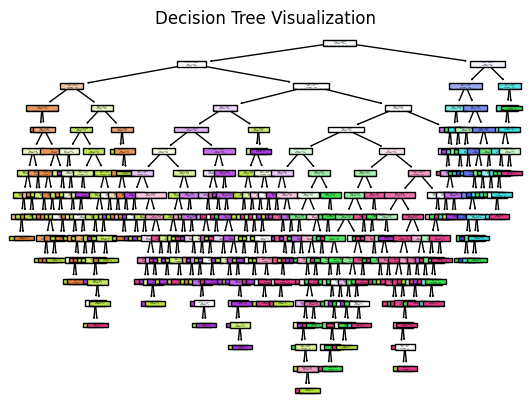

In [28]:
#Visualization
plt.figure(figure=(40,30))
tree.plot_tree(clf,feature_names=x.columns,filled= True)
plt.title('Decision Tree Visualization')
plt.show()

In [29]:
user_defined_values =np.array([[77,19,1.41,0.3,0.1,2.86],
                             [133,30,2.0,1.3,1.99,2.8]])
pred = clf.predict(user_defined_values)
print('Predictions for user-defined values:', pred)

Predictions for user-defined values: ['Overweight_Level_I' 'Obesity_Type_I']


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


*** Support Vector Machine (SVM)***

In [30]:
from sklearn.svm import SVC

In [31]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [32]:
y_pred=svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of SVM algorithm=',accuracy)

Accuracy of SVM algorithm= 0.6813880126182965


In [33]:
user_values = np.array([[77, 36, 1.4,0.2,3.0,9.5 ]])
predicted_class = svm_model.predict(user_values)
print('Predicted class for the user-defined values:', predicted_class)

Predicted class for the user-defined values: ['Overweight_Level_I']


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


*** Random Forest***

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred=rf_classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of RandomForestClassifier algorithm=',accuracy)

Accuracy of RandomForestClassifier algorithm= 0.889589905362776


In [37]:
user_values=np.array([[88,45,1.4,0.2,8.0,0.7]])
prediction=rf_classifier.predict(user_values)
print('Predicted class for the user-defined values:', prediction)

Predicted class for the user-defined values: ['Overweight_Level_II']


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


*** AdaBoost***

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
base_estimator=DecisionTreeClassifier(max_depth=1)
adaboost_classifier=AdaBoostClassifier(estimator=base_estimator,n_estimators=50,random_state=42)
adaboost_classifier.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [40]:
y_pred=adaboost_classifier.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy of AdaBoostClassifier algorithm=',accuracy)

Accuracy of AdaBoostClassifier algorithm= 0.41798107255520506


In [41]:
user_values=np.array([[88,45,1.4,0.2,8.0,0.7]])
prediction=rf_classifier.predict(user_values)
print('Predicted class for the user-defined values:', prediction)

Predicted class for the user-defined values: ['Overweight_Level_II']


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


***oEvaluate and compare the performance of these classifiers using accuracy score.***

1. Accuracy of LogisticRegression algorithm = 0.6482649842271293
2. Accuracy of DecisionTreeClassifier algorithm= 0.8170347003154574
3. Accuracy of SVM algorithm= 0.6813880126182965
4. Accuracy of RandomForestClassifier algorithm= 0.889589905362776
5. Accuracy of AdaBoostClassifier algorithm= 0.41798107255520506

In this dataset ,The RandomForestClassifier is the top performer with the highest accuracy, followed by the DecisionTreeClassifier. The SVM and LogisticRegression have moderate accuracy scores, while the AdaBoostClassifier has the lowest accuracy among the classifiers listed.

## 2. Regression:

<b>1.Task Description:

***oPredict the Weight of individuals using the features Age, Height, and BMI (calculated from Height and Weight).***

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
df1=pd.read_csv('ObesityDataset.csv')


In [44]:
df1=df1[['Age','Height','Weight']]
df1

,Age,Height,Weight
0,21.000000,1.620000,64.000000
1,21.000000,1.520000,56.000000
2,23.000000,1.800000,77.000000
3,27.000000,1.800000,87.000000
4,22.000000,1.780000,89.800000
...,...,...,...
2106,20.976842,1.710730,131.408528
2107,21.982942,1.748584,133.742943
2108,22.524036,1.752206,133.689352
2109,24.361936,1.739450,133.346641


***2.Data Preparation:***

***oCreate a new feature BMI using the formula:***
 

In [45]:
# Calculate BMI
df1['BMI'] = df1['Weight'] / (df1['Height'] ** 2)
df1['BMI']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64

In [46]:
# Features and target
X = df1[['Age', 'Height', 'BMI']]
y = df1['Weight']

***oPrepare the data by splitting it into training and testing sets.***

In [47]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***3.Model Training and Evaluation:***

<b> o Fit the following regression models:

*** Linear Regression***

In [48]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error :',mse)
print('Mean Absolute Error:',mae)
print('r2 score:',r2)

Mean Squared Error : 6.016346234053622
Mean Absolute Error: 1.875028801092967
r2 score: 0.9914675181533662


In [50]:
user_values=np.array([[23,1.7,25.3]])
prediction=model.predict(user_values)
print('Predicted weight for the user-defined values:', prediction)

Predicted weight for the user-defined values: [73.63343927]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*** Decision Tree Regressor***

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error :',mse)
print('Mean Absolute Error:',mae)
print('r2 score:',r2)

Mean Squared Error : 2.299822305740471
Mean Absolute Error: 0.8878602340425533
r2 score: 0.9967383539259853


In [54]:
user_values=np.array([[23,1.7,25.3]])
prediction=model.predict(user_values)
print('Predicted weight for the user-defined values:', prediction)

Predicted weight for the user-defined values: [75.383716]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


*** Random Forest Regressor***

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf_regressor=RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error :',mse)
print('Mean Absolute Error:',mae)
print('r2 score:',r2)

Mean Squared Error : 2.299822305740471
Mean Absolute Error: 0.8878602340425533
r2 score: 0.9967383539259853


In [58]:
user_values=np.array([[23,1.7,25.3]])
prediction=model.predict(user_values)
print('Predicted weight for the user-defined values:', prediction)

Predicted weight for the user-defined values: [75.383716]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


*** Support Vector Regressor (SVR)***

In [59]:
from sklearn.svm import SVR

In [60]:
svm_model=SVR(kernel='linear')
svm_model.fit(X_train,y_train)

SVR(kernel='linear')

In [61]:
y_pred=svm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error :',mse)
print('Mean Absolute Error:',mae)
print('r2 score:',r2)

Mean Squared Error : 10.768505722891092
Mean Absolute Error: 2.405587785116692
r2 score: 0.9847279268809579


In [62]:
user_values=np.array([[23,1.7,25.3]])
prediction=model.predict(user_values)
print('Predicted weight for the user-defined values:', prediction)

Predicted weight for the user-defined values: [75.383716]


C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


***oEvaluate the models using performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.***

***CLUSTRING***

DESCRIPTION:	Perform clustering to group individuals based on their features.

Clustering involves grouping individuals based on their features to identify patterns and similarities within the data. Techniques like K-Means or DBSCAN can be used to partition data into distinct clusters for further analysis.

In [63]:
df1=pd.read_csv('ObesityDataset.csv')

o	Apply the K-Means clustering algorithm to create clusters based on features Age, Height, Weight, and BMI.

In [65]:
df1=df[['Age','Weight']]
df1


,Age,Weight
0,21.000000,64.000000
1,21.000000,56.000000
2,23.000000,77.000000
3,27.000000,87.000000
4,22.000000,89.800000
...,...,...
2106,20.976842,131.408528
2107,21.982942,133.742943
2108,22.524036,133.689352
2109,24.361936,133.346641


In [66]:
df2=df[['NObeyesdad']]
df2

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


o	Standardize the features before applying clustering.

In [67]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [69]:
# Define the number of clusters
n_clusters = 3



In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
# Initialize and fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3, random_state=0)

In [72]:
# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
print(centers)
print(labels)
df1['cluster_num']= labels
df1= df1.join(df2)

[[ 1.88328221 -0.0544005 ]
 [-0.00379293  1.06453965]
 [-0.5894973  -0.77170722]]
[2 2 2 ... 1 1 1]


o	Display the resulting clusters and analyze their characteristics.

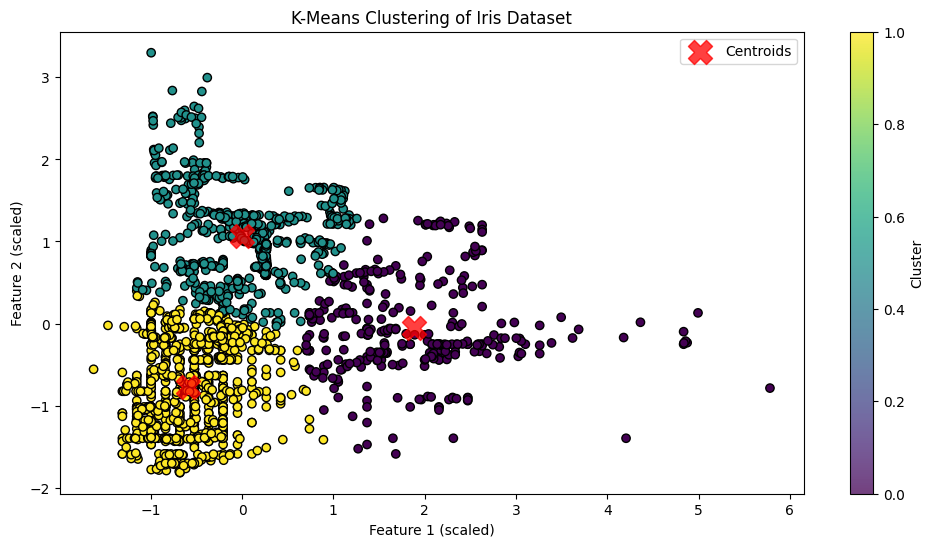

In [73]:
plt.figure(figsize=(12, 6))
plt.scatter(df1_scaled[:, 0], df1_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering of Iris Dataset')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


o	Evaluate the clustering results using metrics such as Silhouette Score and Davies-Bouldin Index.

In [74]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df1_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.51


In [75]:
#calculate davis bouldin score
from sklearn.metrics import davies_bouldin_score

In [76]:
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

In [77]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

In [78]:
db_index = davies_bouldin_score(X, labels)

In [79]:
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.1649578691553562
